\newpage

## Question

1) We consider the dataset from the Early Stage of Indians Chronic Kidney Disease (CKD) project for the following analysis. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.model_selection import train_test_split

In [5]:
kd = pd.read_csv(r"C:\Users\xuany\OneDrive\Documents\McMaster\23-24\Winter2024\Stats3DA3\Assignment-6-Chronic-Kidney-Disease-Classification-Challenge\kidney_disease.csv")

In [6]:
kd = kd.drop('id', axis = 1)

In [7]:
kd.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
kd.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [9]:
kd

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


The classification problem here is that we need to predict whether a patient has Chronic Kidney Disease (CKD) based on various medical indicators. According to a literature review by Sanmarchi et al., (2023), CKD is a state of progressive loss of kidney function ultimately resulting in the need for renal replacement therapy. CKD prevalence is growing worldwide, and so it is important to assess how to efficiently diagnose and treat patients with CKD. And so our objective is to use ML to help distinguish between healthy individuals and those with CKD.

2.

In [10]:
float_col = kd.select_dtypes(include = 'float64').columns
object_col = kd.select_dtypes(include = 'object').columns

In [11]:
mappings = {
    'rbc': {'normal': True, 'abnormal': False},
    'pc': {'normal': True, 'abnormal': False},
    'pcc': {'present': True, 'notpresent': False},
    'ba': {'present': True, 'notpresent': False},
    'htn': {'yes': True, 'no': False},
    'dm': {'yes': True, 'no': False},
    'cad': {'yes': True, 'no': False},
    'pe': {'yes': True, 'no': False},
    'ane': {'yes': True, 'no': False},
    'appet': {'good': True, 'poor': False},
}


In [12]:
for column, mapping in mappings.items():
    kd[column] = kd[column].replace(mapping)

In [13]:
kd.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,True,False,False,121.0,...,44,7800,5.2,True,True,False,True,False,False,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,True,False,False,NaN,...,38,6000,NaN,False,False,False,True,False,False,ckd
2,62.0,80.0,1.010,2.0,3.0,True,True,False,False,423.0,...,31,7500,NaN,False,True,False,False,False,True,ckd
3,48.0,70.0,1.005,4.0,0.0,True,False,True,False,117.0,...,32,6700,3.9,True,False,False,False,True,True,ckd
4,51.0,80.0,1.010,2.0,0.0,True,True,False,False,106.0,...,35,7300,4.6,False,False,False,True,False,False,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,False,False,74.0,...,39,7800,4.4,True,True,False,True,True,False,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,True,False,False,100.0,...,36,NaN,NaN,False,False,False,True,False,False,ckd
7,24.0,NaN,1.015,2.0,4.0,True,False,False,False,410.0,...,44,6900,5,False,True,False,True,True,False,ckd
8,52.0,100.0,1.015,3.0,0.0,True,False,True,False,138.0,...,33,9600,4.0,True,True,False,True,False,True,ckd
9,53.0,90.0,1.020,2.0,0.0,False,False,True,False,70.0,...,29,12100,3.7,True,True,False,False,False,True,ckd


In [14]:
scaler = StandardScaler()
kd[float_col] = scaler.fit_transform(kd[float_col])

3.

In [15]:
kd.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00


The dataset consists of results to various medical tests including blood pressure (bp), hemoglobin, sugar, etc. This is a combination of continuous, discrete, and categorical variables. The initial analysis showed some missing values and possible outliers which were both addressed accordingly.

4.

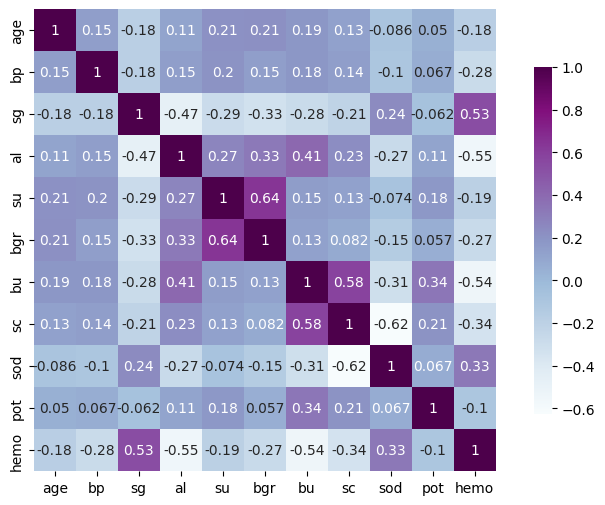

In [ ]:
plt.figure(figsize=(10, 6))
df_floats = kd[float_col]
df_floats = df_floats.apply(lambda x: x.fillna(x.mean()), axis=0)
correlation_matrix = df_floats.corr()
sns.heatmap(correlation_matrix, 
    annot=True, 
    cmap='BuPu', 
    cbar=True, 
    square=True, 
    cbar_kws={"shrink": .75})
plt.show()

The correlation matrix and its corresponding heatmap shows us how variables are interrelated. For example, there is a strong positive correlation between the specific gravity of urine (sg) and hemoglobin levels (hemo), a correlation coefficient of 0.53. This means that as the concentration of urine increases (higher specific gravity), hemoglobin levels will increase as well. In addition, there is a strong positive correlation between serum creatinine (sc) and blood urea levels (bu), a correlation coefficient of 0.58. Both of these variables are waste products filtered by the kidneys. So high levels of both of these can correlate to kidney function impairment. In feature selection for CKD prediction, using these two variables may be highly informative as they are highly correlated with eachother. It is useful at this time to consider using Principal Component Analysis to capture information from both variables in a single feature. These findings suggest that some features are closely related to physiological processes affected by CKD and are important for predicting the disease.